<a href="https://colab.research.google.com/github/Thames07/Apply-Uniabuja_Student_Alcholic_Consumption/blob/main/Arima_and_sarima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [9]:
df = pd.read_csv("/content/drive/MyDrive/AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:
# Updating the header
df.columns=["Month","Passengers"]
df.head()
df.describe()
df.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

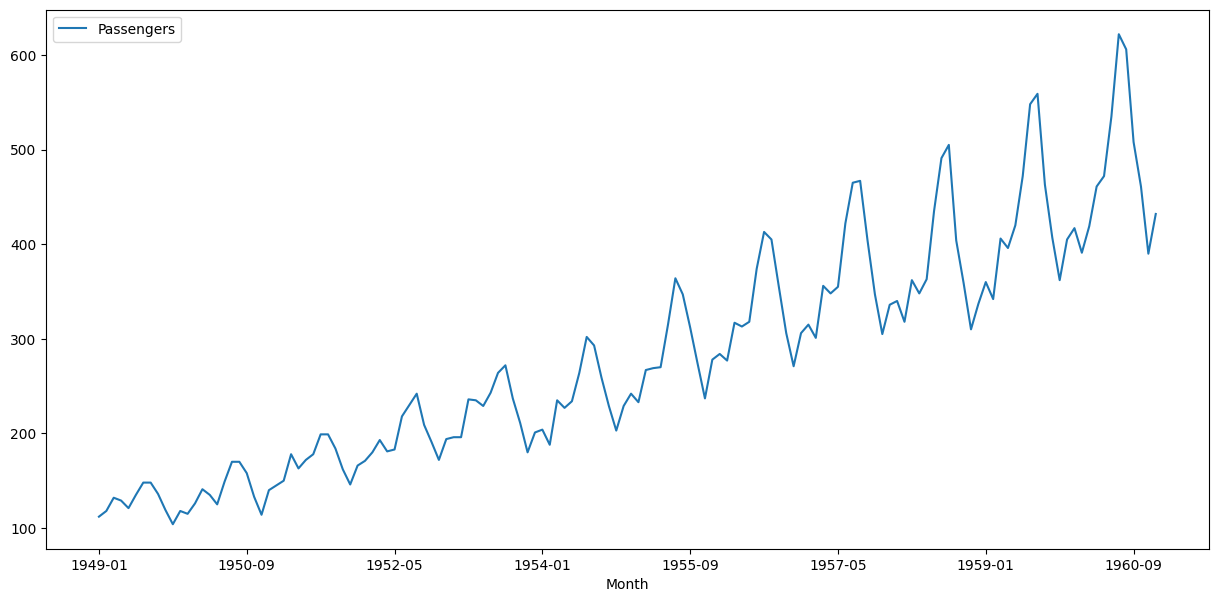

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Passengers'])

In [15]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if test_result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Passengers'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 0.8153688792060498
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations : 130


In [16]:
df['Passengers First Difference'] = df['Passengers'] - df['Passengers'].shift(1)
df['Seasonal First Difference']=df['Passengers']-df['Passengers'].shift(12)
df.head()

,Passengers,Passengers First Difference,Seasonal First Difference
Month,,,
1949-01,112,NaN,NaN
1949-02,118,6.0,NaN
1949-03,132,14.0,NaN
1949-04,129,-3.0,NaN
1949-05,121,-8.0,NaN


In [17]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.383020726492481
p-value : 0.011551493085514952
#Lags Used : 1
Number of Observations : 130


<Axes: xlabel='Month'>

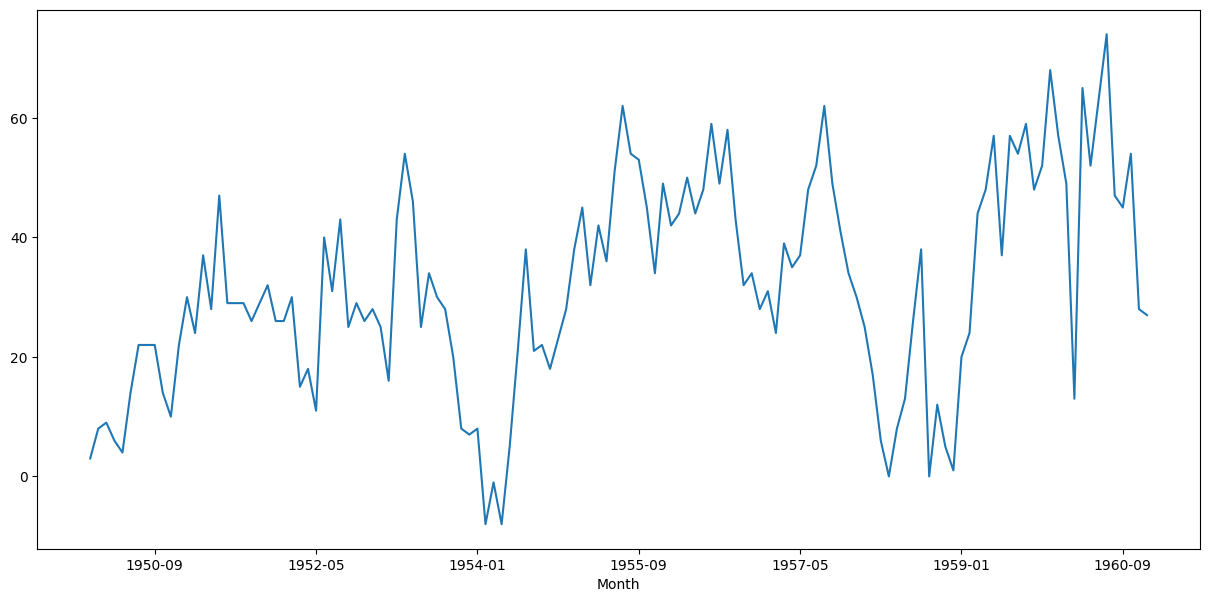

In [18]:
df['Seasonal First Difference'].plot()


##### I am going to create auto-correlation :

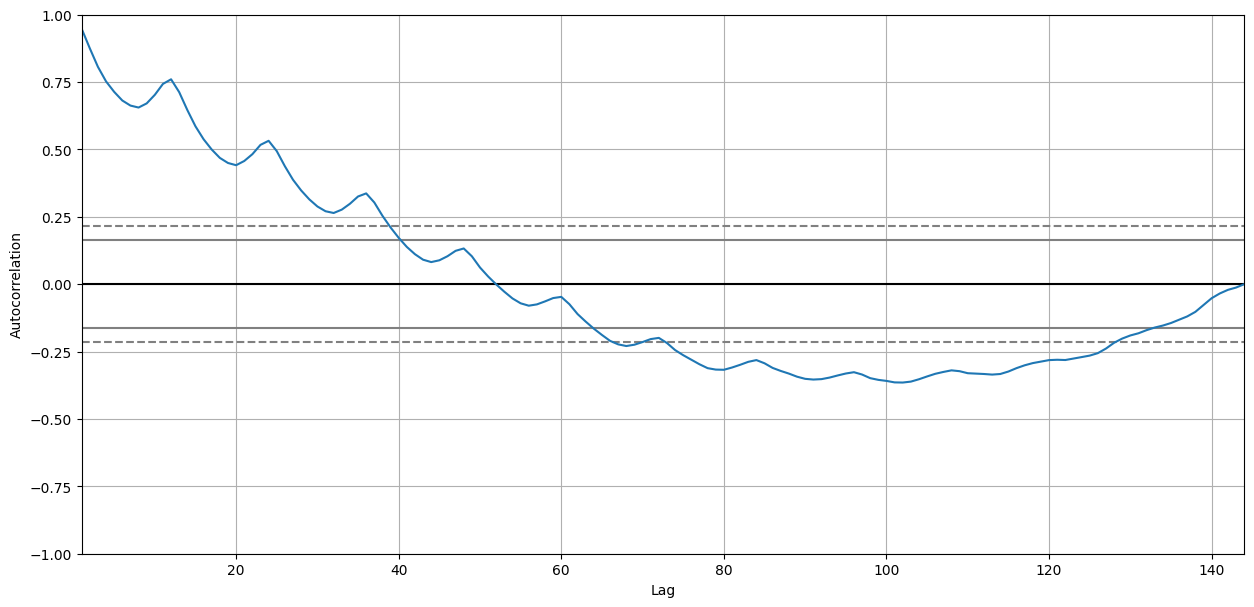

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


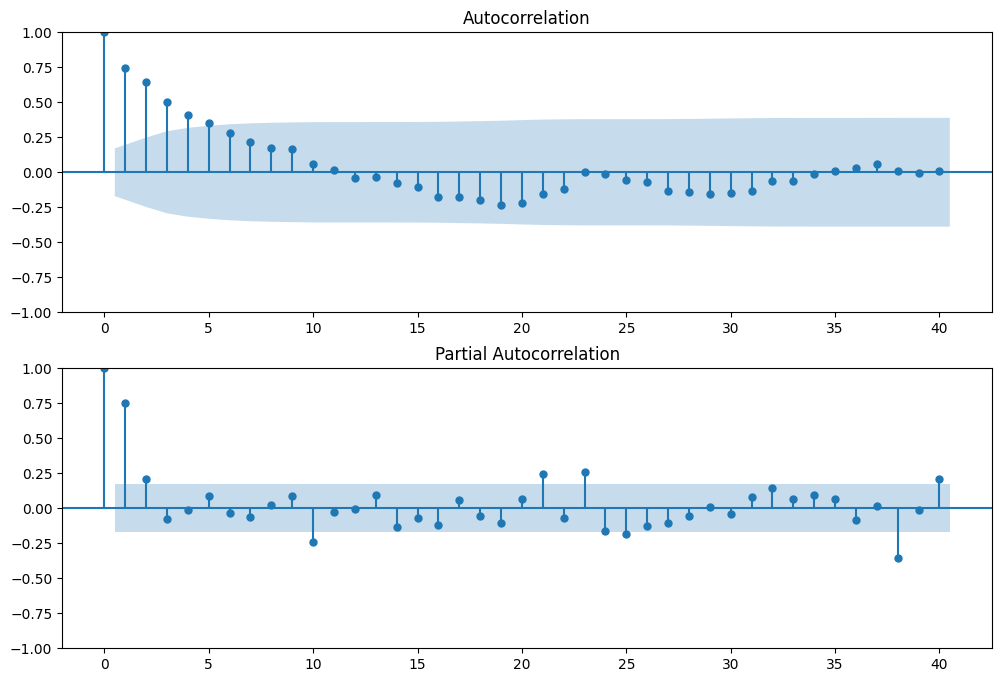

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [26]:
model=ARIMA(df['Passengers'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Fri, 31 Mar 2023   AIC                           1394.683
Time:                        17:19:20   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.000     751.362    1172.492
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               7.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

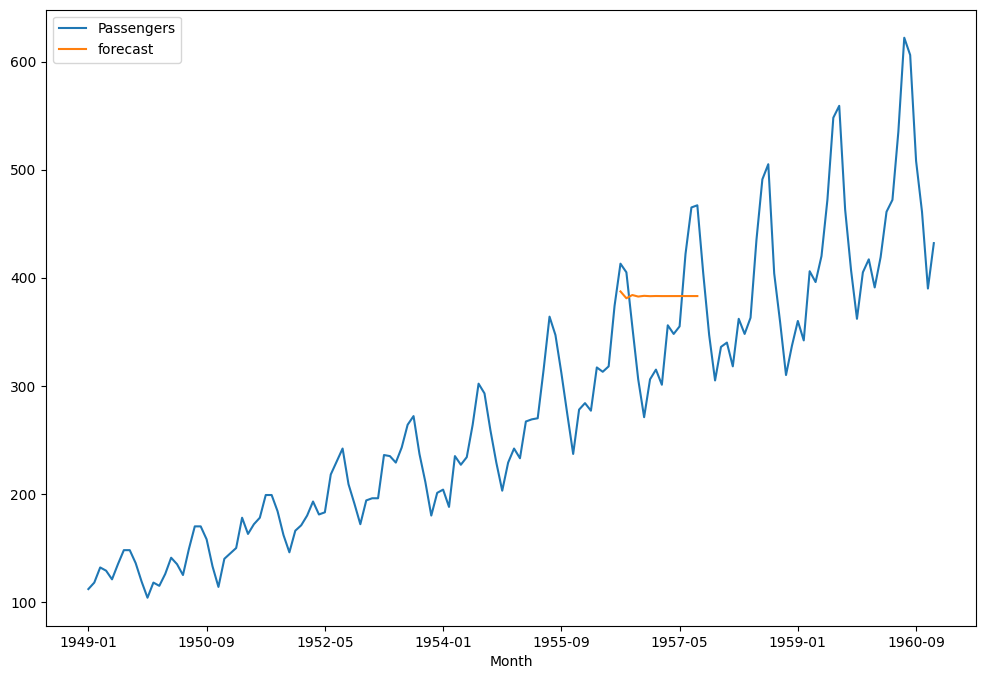

In [27]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

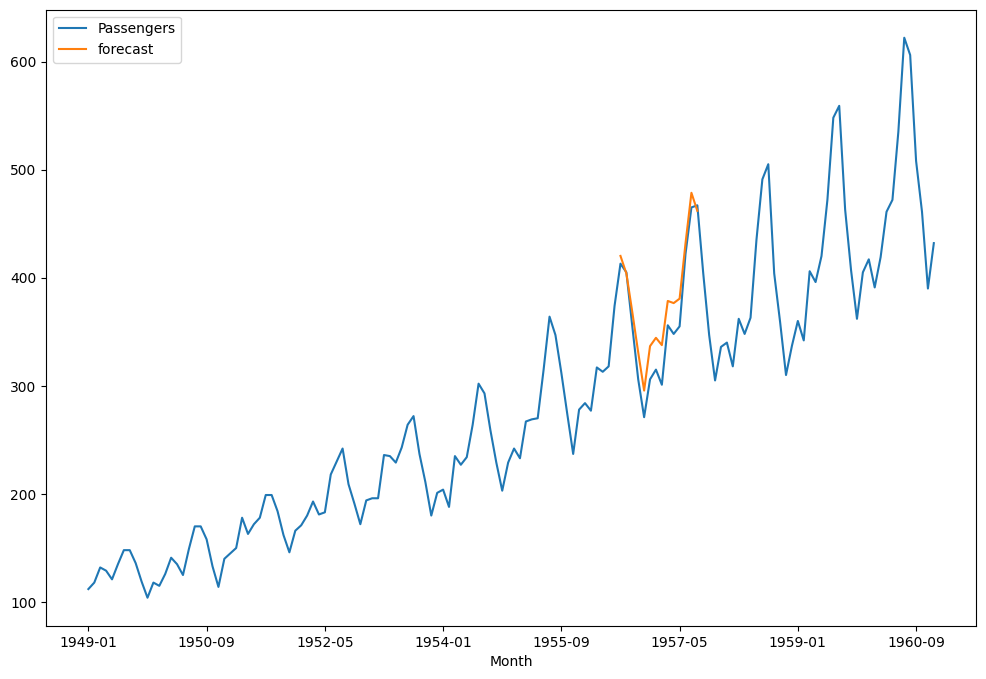

In [31]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))